In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout


In [17]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/google.csv')


In [18]:
data.head()


,Date,High,Low,Open,Close,Volume,Adj Close
0,2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
1,2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2,2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
3,2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
4,2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4317 entries, 0 to 4316
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4317 non-null   object 
 1   High       4317 non-null   float64
 2   Low        4317 non-null   float64
 3   Open       4317 non-null   float64
 4   Close      4317 non-null   float64
 5   Volume     4317 non-null   float64
 6   Adj Close  4317 non-null   float64
dtypes: float64(6), object(1)
memory usage: 236.2+ KB


In [20]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4317 entries, 0 to 4316
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4317 non-null   object 
 1   High       4317 non-null   float64
 2   Low        4317 non-null   float64
 3   Open       4317 non-null   float64
 4   Close      4317 non-null   float64
 5   Volume     4317 non-null   float64
 6   Adj Close  4317 non-null   float64
dtypes: float64(6), object(1)
memory usage: 236.2+ KB


In [22]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape


(4317, 1)

In [23]:
X_train = []
y_train = []


In [24]:
for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

model = Sequential()



In [25]:
model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))


In [26]:
model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")


In [27]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 33s - loss: 4.5681e-04 - 33s/epoch - 948ms/step
Epoch 2/20
35/35 - 10s - loss: 6.6253e-05 - 10s/epoch - 280ms/step
Epoch 3/20
35/35 - 8s - loss: 6.1925e-05 - 8s/epoch - 231ms/step
Epoch 4/20
35/35 - 10s - loss: 4.4793e-05 - 10s/epoch - 282ms/step
Epoch 5/20
35/35 - 10s - loss: 4.1702e-05 - 10s/epoch - 278ms/step
Epoch 6/20
35/35 - 8s - loss: 4.2871e-05 - 8s/epoch - 230ms/step
Epoch 7/20
35/35 - 12s - loss: 5.3883e-05 - 12s/epoch - 347ms/step
Epoch 8/20
35/35 - 8s - loss: 4.8172e-05 - 8s/epoch - 222ms/step
Epoch 9/20
35/35 - 11s - loss: 3.6511e-05 - 11s/epoch - 305ms/step
Epoch 10/20
35/35 - 12s - loss: 4.1102e-05 - 12s/epoch - 335ms/step
Epoch 11/20
35/35 - 8s - loss: 3.4666e-05 - 8s/epoch - 237ms/step
Epoch 12/20
35/35 - 13s - loss: 3.5150e-05 - 13s/epoch - 371ms/step
Epoch 13/20
35/35 - 10s - loss: 2.8328e-05 - 10s/epoch - 279ms/step
Epoch 14/20
35/35 - 9s - loss: 2.7986e-05 - 9s/epoch - 252ms/step
Epoch 15/20
35/35 - 9s - loss: 3.1435e-05 - 9s/epoch - 256ms/step
E

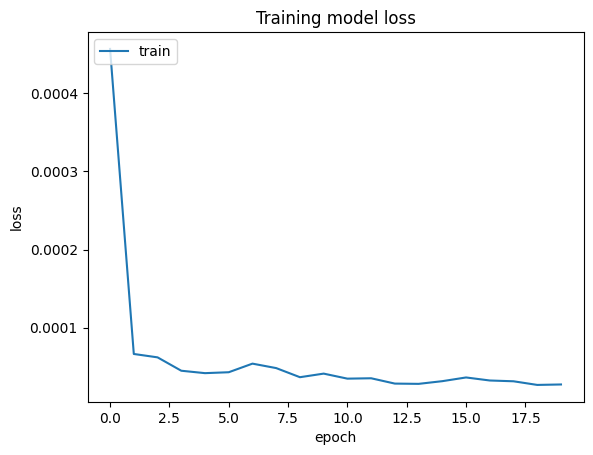

In [28]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()


In [30]:
testData = pd.read_csv('/content/drive/MyDrive/google.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape


(4257, 60, 1)

In [31]:
y_pred = model.predict(X_test)
import pandas as pd
df = pd.DataFrame(y_pred, columns = ['Predicted stock Value'])
print(df)


134/134 [==============================] - 16s 87ms/step
      Predicted stock Value
0                  0.015771
1                  0.015151
2                  0.014593
3                  0.014131
4                  0.013762
...                     ...
4252               0.788612
4253               0.784142
4254               0.780177
4255               0.777313
4256               0.775974

[4257 rows x 1 columns]


In [32]:
predicted_price = sc.inverse_transform(y_pred)

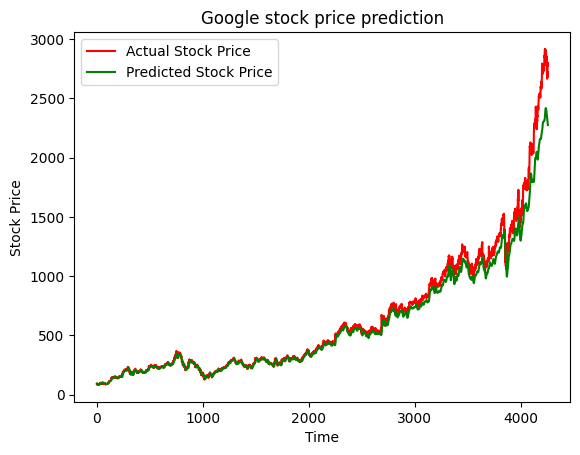

In [33]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
